# Data Project - Stock Market Analysis

Welcome to your second data project! In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

1.) What was the change in price of the stock over time?

2.) What was the daily return of the stock on average?

3.) What was the moving average of the various stocks?

4.) What was the correlation between different stocks' closing prices?

5.) What was the correlation between different stocks' daily returns?

6.) How much value do we put at risk by investing in a particular stock?

7.) How can we attempt to predict future stock behavior?

# Section 1:  Basic Analysis of Stock Information

- In this section we'll go over how to handle requesting stock information with pandas, and how to
analyze basic attributes of a stock.

In [1]:
#Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')   # gives you a nice whitegrid background for all visualizations
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader import data as pdr

import fix_yahoo_finance as yf
yf.pdr_override()

# For time stamps
from datetime import datetime

# For division - for Python 2.7 users
# from __future__ import division

Helpful Hints: 

1.) Download DataFrame => 
    - data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")

2.) Download Panel =>
    - data = pdr.get_data_yahoo(["SPY", "IWM"], start="2017-01-01", end="2017-04-30")

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
# Set up End and Start times for data grab
end = datetime.now()

start = datetime((end.year - 1),end.month,end.day)   # the end.year - 1, is to get last year's date this time.

In [4]:
# For loop for grabbing yahoo finance data and setting as a dataframe
for stock in tech_list:
    # Set DataFrame as the Stock Ticker; 
    # Syntax: Globals function is taking the stock ticker(string_stock_name) and making it a global variable
    # - this allows you to call any stock, and its data becomes your dataframe
    # = (stock_name,website,start_date,end_date)
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)



[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded


[                       0%                       ]

[*********************100%***********************]  1 of 1 downloaded

In [5]:
# Now that the stock tickers have been globalized, we can call either ticker and its data will be presented in a
# dataframe format for us to manipulate and analyze.
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-30,970.309998,976.200012,969.489990,975.880005,975.880005,1466700
2017-05-31,975.020020,979.270020,960.179993,964.859985,964.859985,2448100
2017-06-01,968.950012,971.500000,960.010010,966.950012,966.950012,1410500
2017-06-02,969.460022,975.880005,966.000000,975.599976,975.599976,1751000
2017-06-05,976.549988,986.909973,975.099976,983.679993,983.679993,1252100


In [6]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,165.216032,166.557143,163.886310,165.247381,163.818750,3.042140e+07
std,11.635851,11.759390,11.688080,11.728807,12.265361,1.261344e+07
min,142.899994,143.500000,142.199997,142.270004,140.092300,1.402670e+07
25%,156.335003,157.392494,155.027500,155.994999,154.175801,2.157620e+07
50%,166.620002,168.559998,164.825005,166.805000,165.746872,2.685915e+07
75%,174.042499,175.174995,173.050003,174.299995,172.925423,3.549350e+07
max,189.490005,190.369995,187.860001,190.039993,189.309998,8.659380e+07


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-05-30 to 2018-05-29
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


- Now that we've seen the DataFrame, let's go ahead and plot out the volume and closing price of
the stocks

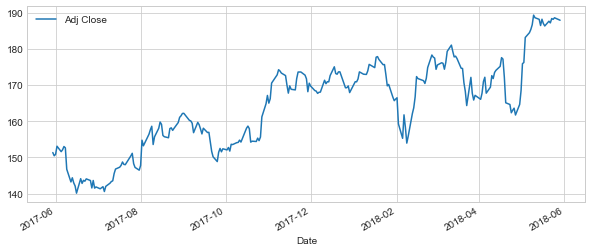

In [8]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

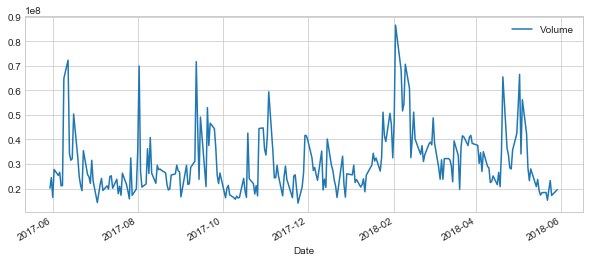

In [9]:
# Plotting the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

- Now that we've seen the visualizations for the closing price and the volume traded each day, let's
go ahead and calculate the moving average for the stock. 

For more infor on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [77]:
# Pandas has a built-in rolling mean calculator
# Plotting out several moving averages:
# Here, im creating a list of moving_avgs, one for 10 days, 20 days, etc.
ma_day = [10,20,50]

for ma in ma_day:
    # Creating a column name, (just a string) and converting the moving_avg(int) to a string so it can be contained
    # within the column with a datatype of string.
    # its easier to store the column string name in a variable and pass the variable
    column_name = "MA for %s days" %(str(ma))   
    # Creating a new column in the AAPL dataframe, based on the column name, and calling pandas' '.rolling_mean()'
    # function, which takes 2 arguments(column_name,moving_avg)
    # AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)  # .rolling_mean() is deprecated
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

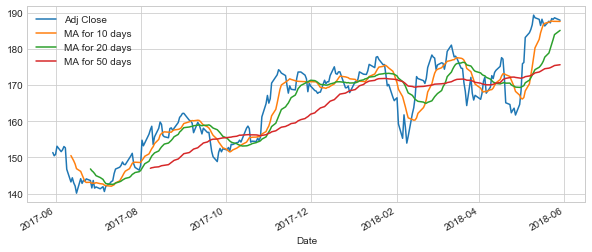

In [78]:
# Plotting all the additional Moving Averages
# Syntax to call multiple columns; set subplots=False to get all the data plotted on 1 graph instead of a single
# graph for each column of data called.
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

# Section 2:  Daily Return Analysis

- Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

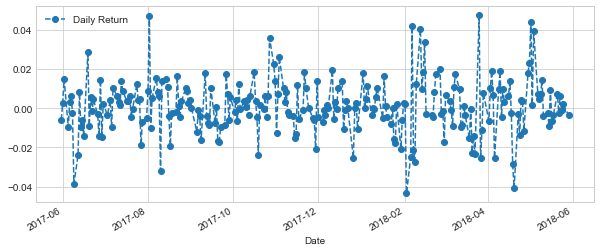

In [79]:
# We'll use pct_change to find the percent change for each day by making a new column, 'Daily Return'
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

- Now let's get an overall look at the average daily return using a histogram. We'll use seaborn to 
create both a histogram and KDE plot on the same figure.

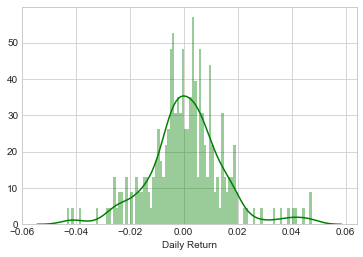

In [80]:
# Note the use of '.dropna()' here, otherwise teh NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

# Could have also used the below code as well to do the same thing:
# AAPL['Daily Return'].hist(bins=100)

- Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and 
build a DataFrame wit all the ['Close'] columns for each of the stocks dataframes.

In [81]:
# Grabbing all the closing prices (from the 'Adj Close' column) for the tech stock list into one DataFrame:
closing_df = pdr.get_data_yahoo(tech_list,start,end)['Adj Close']

[                       0%                       ]

[**********************50%                       ]  2 of 4 downloaded

[**********************75%***********            ]  3 of 4 downloaded

[*********************100%***********************]  4 of 4 downloaded

[*********************100%***********************]  4 of 4 downloaded

In [82]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-30,151.317795,996.700012,975.880005,69.061729
2017-05-31,150.421722,994.619995,964.859985,68.502632
2017-06-01,150.835281,995.950012,966.950012,68.757652
2017-06-02,153.070541,1006.729980,975.599976,70.385864
2017-06-05,151.573807,1011.340027,983.679993,70.895905


- Now that we have all the closing prices let's go ahead and get the daily return for all the stocks,like we did for the Apple stock.

In [83]:
# Making a new dataframe, 'tech_rets' for tech returns.
tech_rets = closing_df.pct_change()

- Now we can compare the daily percentage return of two stocks to check how correlated they are. 
First let's see a stock compared to itself.

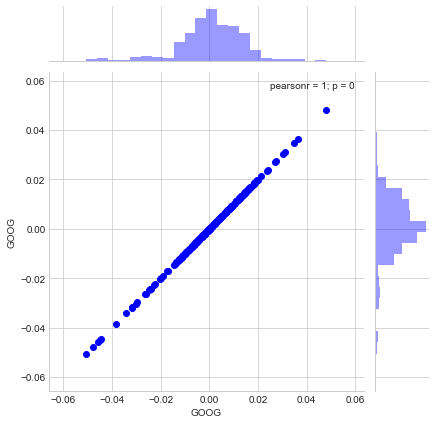

In [84]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='blue')

- Now we can see that if two stocks are perfectly (and positively) correlated with each other then
a linear relationship between its daily return values should occur. So let's compare Google and 
Microsoft the same way.

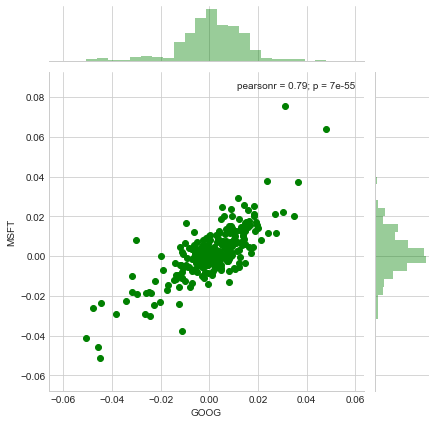

In [85]:
# We'll just use jointplot() to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='green')

- Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

In [86]:
url = 'http://en.wikipedia.org/wiki/Pearson_product_moment_correlation_coefficient'

In [87]:
# But for a quick intuitive sense check out the picture below.
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

<IPython.core.display.SVG object>

-Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

In [88]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-05-30,NaN,NaN,NaN,NaN
2017-05-31,-0.005922,-0.002087,-0.011292,-0.008096
2017-06-01,0.002749,0.001337,0.002166,0.003723
2017-06-02,0.014819,0.010824,0.008946,0.023680
2017-06-05,-0.009778,0.004579,0.008282,0.007246


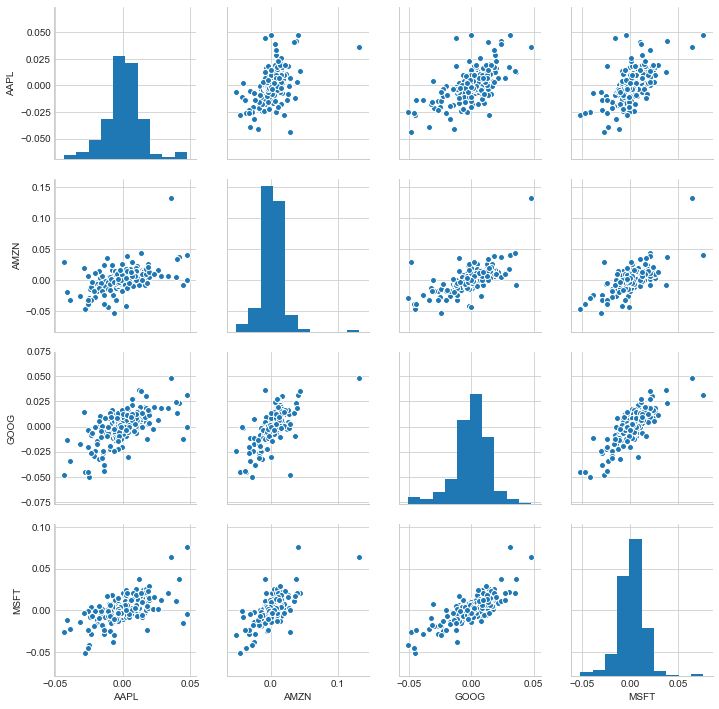

In [89]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

- Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


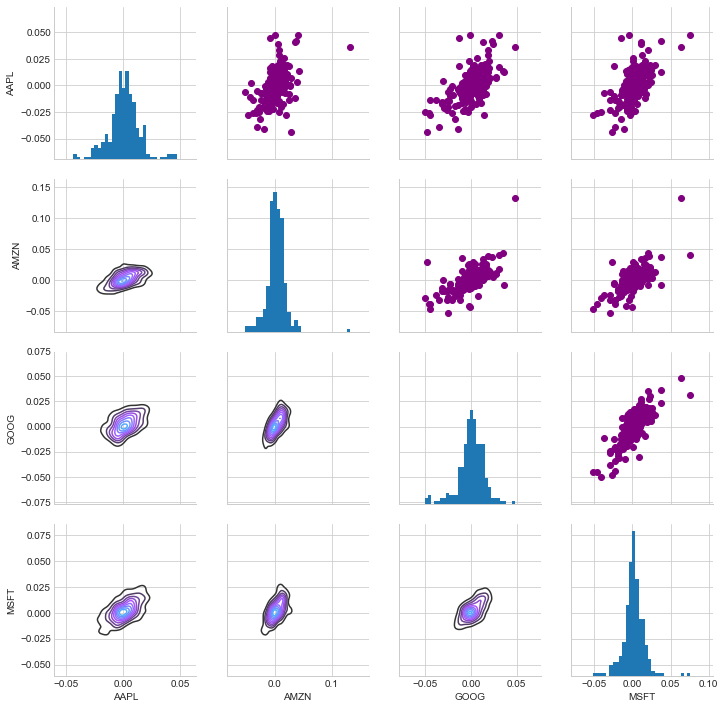

In [90]:
# Set up our figure by naming it 'returns_fig', call PairPlot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, including the plot type (KDE) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

- We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

/Users/calvertlouden/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


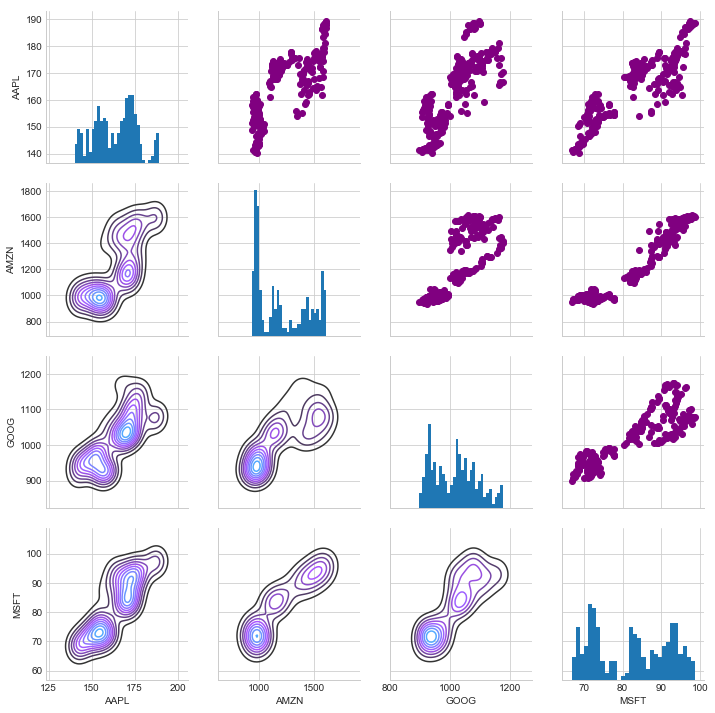

In [91]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)


-Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

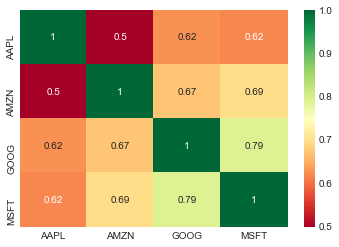

In [96]:
# Let's go ahead and use seaborn for a quick correlation plot for the daily returns
# Computing the correlation matrix
corr = (tech_rets.dropna()).corr()

sns.heatmap(corr,cmap='RdYlGn',annot=True)

- Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Great! Now that we've done some daily return analysis, let's go ahead and start looking deeper into actual risk analysis.

Risk Analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

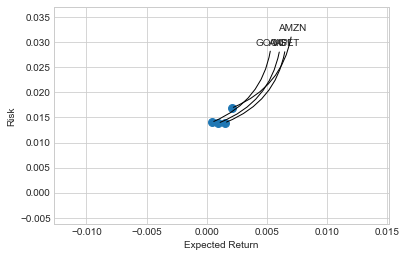

In [98]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

# defining the area used for the circles in the scatter plot
area = np.pi*20 

plt.scatter(rets.mean(), rets.std(),s = area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
# plt.ylim([0.01,0.025])
# plt.xlim([-0.003,0.004])

# Set the plot axis titles
plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
# use the 'zip()' function to call multiple things at once
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
# for label, x,y, for every column in rets dataframe, set x as the mean and y as the std
# look at the syntax label(x,y) zip(rets.columns=label,x=rets.mean(),y=rets.std())
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords ='offset points', ha ='right', va ='bottom',
        arrowprops = dict(arrowstyle ='-', connectionstyle ='arc3,rad=-0.3'))
    

- Value at Risk

Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

- Value at risk using the "bootstrap" method

For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

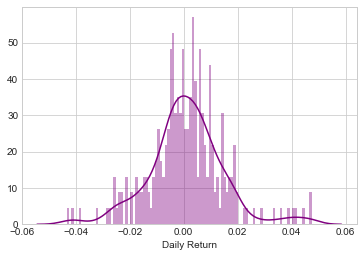

In [100]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [103]:
# Use quantile, which is built into pandas, to get the risk value of the stock; the 0.05 empirical quantile of
# daily return means with 95% confidence or if simulated, 95% of the time your worse daily loss wouldn't exceed
# 2.3%

rets['AAPL'].quantile(0.05)

-0.022905648734432293

The 0.05 empirical quantile of daily returns is at -0.023. That means that with 95% confidence, our worst daily loss will not exceed 2.3%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.023 * 1,000,000 = $23,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

# Value at Risk using the Monte Carlo Method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

The equation for geometric Browninan motion is given by the following equation:

((ΔS)/S) = μΔt + σϵ√(Δt)

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

ΔS = S(μΔt + σϵ√(Δt))

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each tiem period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.


For more info on the Monte Carlo method for stocks, check out the following link:
http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll
define the variables we'll be using the Google DataFrame 'GOOG'

In [104]:
# Set up our time horizon
days = 365

# Set up our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses the
sigma and mu we already calculated from out of daily returns.

In [106]:
def stock_monte_carlo(start_price,days,mu,sigma):
    """ This function takes in starting stock price, days of simulation, mu, sigma, and returns simulated price
    array."""
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for  number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        # Calculate Drift:
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [108]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-30,970.309998,976.200012,969.489990,975.880005,975.880005,1466700
2017-05-31,975.020020,979.270020,960.179993,964.859985,964.859985,2448100
2017-06-01,968.950012,971.500000,960.010010,966.950012,966.950012,1410500
2017-06-02,969.460022,975.880005,966.000000,975.599976,975.599976,1751000
2017-06-05,976.549988,986.909973,975.099976,983.679993,983.679993,1252100


Text(0.5,1,'Monte Carlo Analysis for Google')

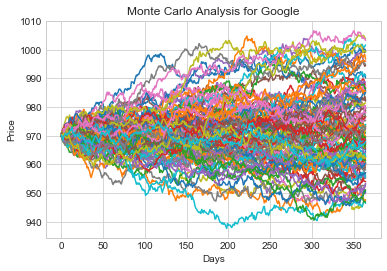

In [111]:
# Get start price from GOOG.head()
start_price = 970.31

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [112]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of NumPy to only display 0 - 5  points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

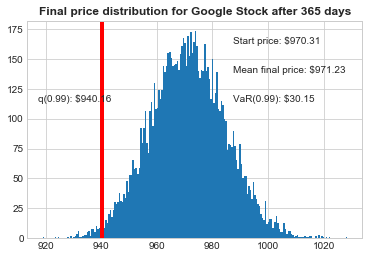

In [114]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall 
# between here
q = np.percentile(simulations,1)

# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6,0.8, s='Start price: $%.2f' %start_price)

# Mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f' %(start_price - q,))

# Display 1% quantile
plt.figtext(0.15,0.6, 'q(0.99): $%.2f' %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth=4,color='r')

# Title
plt.title(u'Final price distribution for Google Stock after %s days' %days, weight='bold')


Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be 30.15 for every investment of 970.31 
(the price of one inital google stock).

This basically menas for every initial stock you purchase, your'e putting about 30.15 at risk 99%  
of the time (over the course of a year) from our Monte Carlo Simulation.

Congrats on finishing the Stock Market Data Analysis project! Here are some additional quesitons and excercises for you to do:

1.) Estimate the values at risk using both methods we learned in this project for a stock not 
related to technology.

2.) Build a practice portfolio and see how well you can predict you risk values with real stock 
information!

3.) Look further into correlatino of two stocks and see if that gives you any insight into future 
possible stock prices.